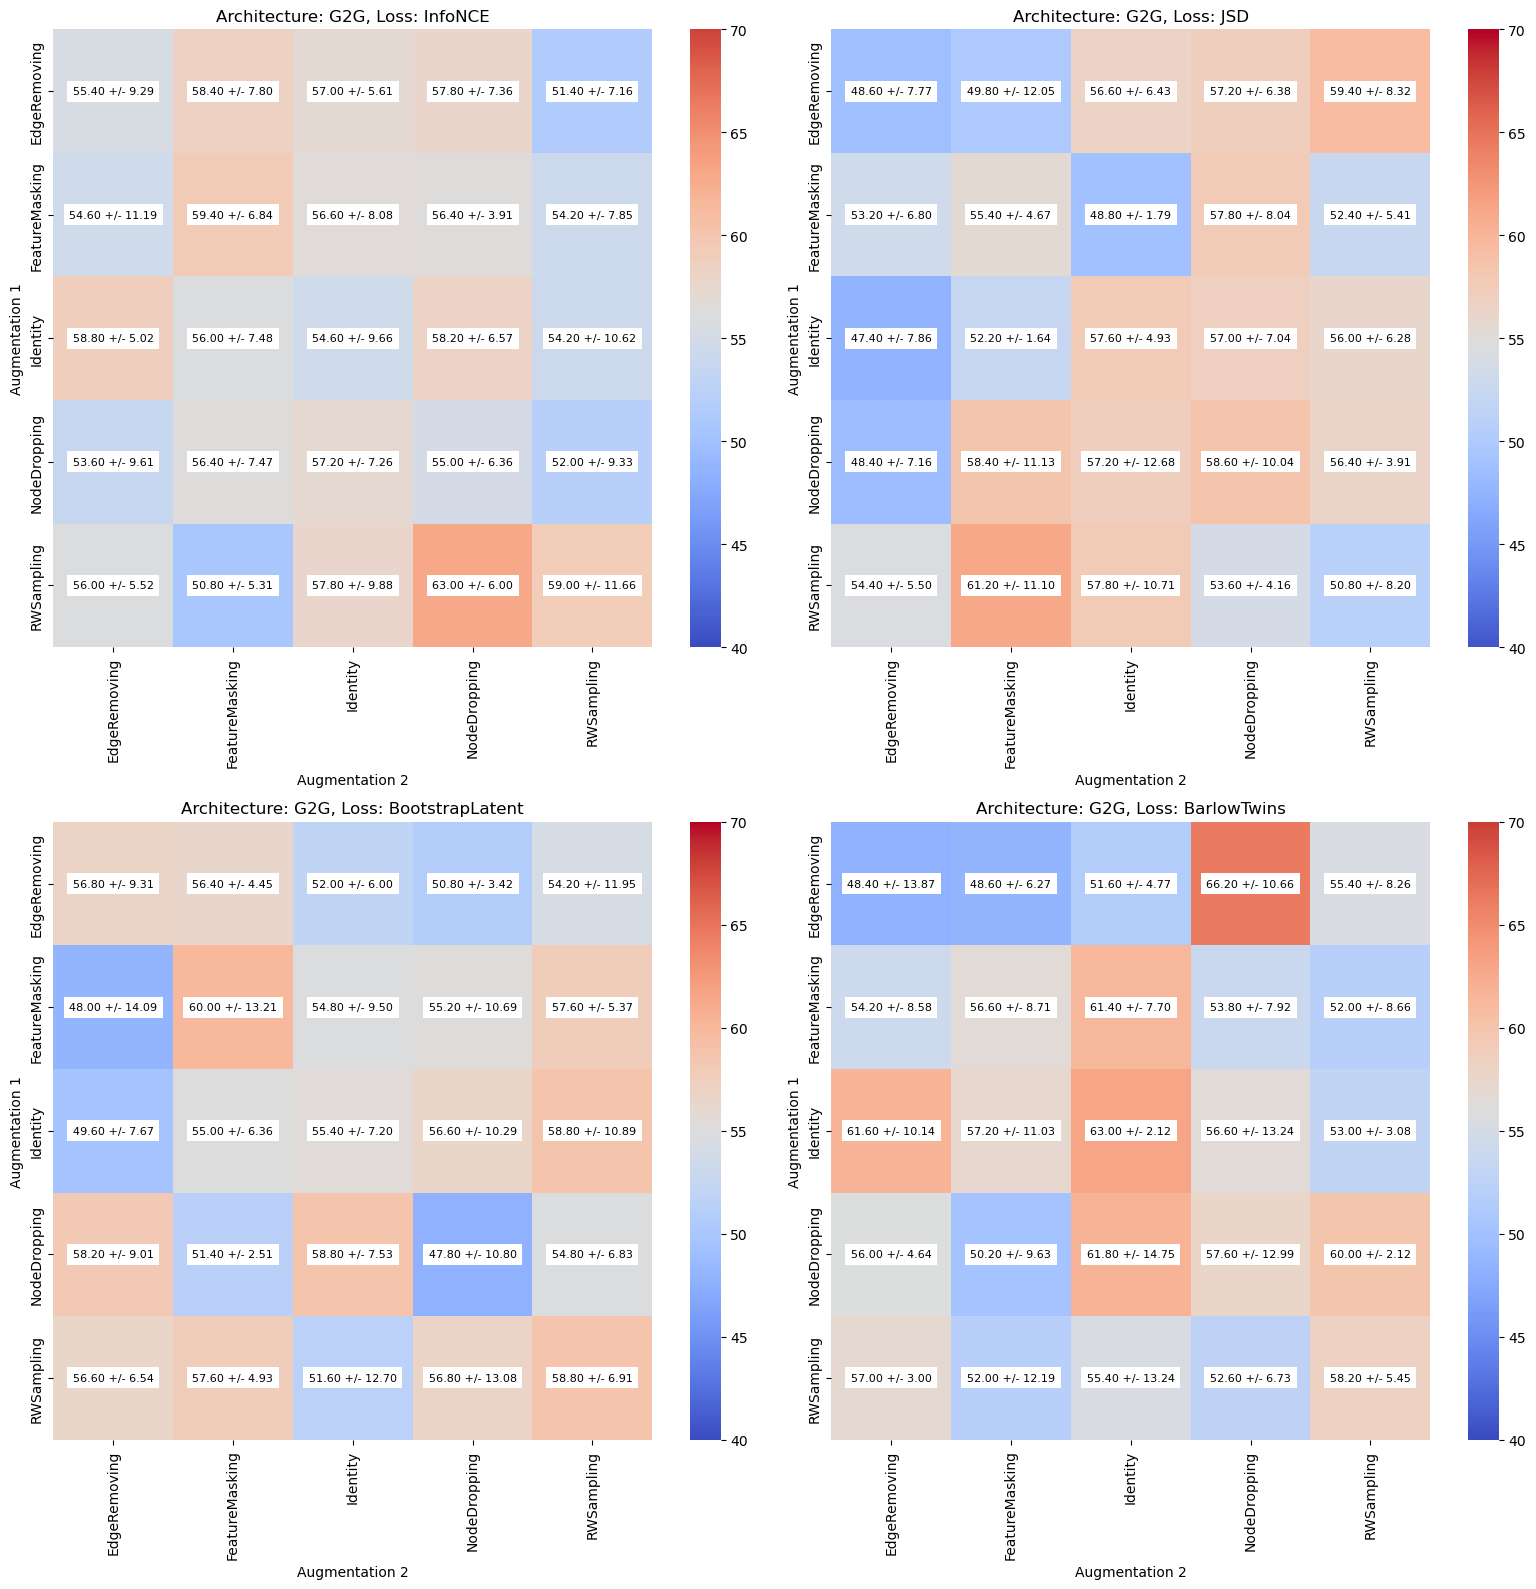

In [10]:
import sys
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

OUPUT_FOLDER = "../output"
FIG_FOLDER = "../fig"

def cross_augmentation_plot(ax, df, title=None):
    grouped_data = df.groupby(["Aug1", "Aug2"])["MicroF1"].agg(["mean", "std"]).reset_index()
    pivot_data_mean = grouped_data.pivot_table(index="Aug1", columns="Aug2", values="mean")
    pivot_data_std = grouped_data.pivot_table(index="Aug1", columns="Aug2", values="std")

    sns.heatmap(
        pivot_data_mean,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=pivot_data_mean.values.mean(),
        vmin=40,
        vmax=70,
        ax=ax
    )

    for i in range(len(pivot_data_mean.index)):
        for j in range(len(pivot_data_mean.columns)):
            _ = pivot_data_mean.index[i]
            _ = pivot_data_mean.columns[j]
            mean_val = pivot_data_mean.values[i][j]
            std_val = pivot_data_std.values[i][j]
            ax.text(
                j + 0.5,
                i + 0.5,
                f"{mean_val:.2f} +/- {std_val:.2f}",
                ha="center",
                va="center",
                fontsize=8,  # Set the fontsize here
                bbox=dict(facecolor="white", alpha=1.0, edgecolor="none"),
            )
    ax.set_title(title)
    ax.set_xlabel("Augmentation 2")
    ax.set_ylabel("Augmentation 1")

files = [
    "augmentation_benchmark_graphcl_infonce.csv",
    "augmentation_benchmark_graphcl_jsd.csv",
    "augmentation_benchmark_graphcl_bootstrap.csv",
    "augmentation_benchmark_graphcl_barlow.csv"
]
losses = ["InfoNCE", "JSD", "BootstrapLatent", "BarlowTwins"]

fig, axs = plt.subplots(2, 2, figsize=(16, 16))

for i, (file, loss) in enumerate(zip(files, losses)):
    row = i // 2
    col = i % 2
    result_df = pd.read_csv(osp.join(OUPUT_FOLDER, file))
    result_df["MicroF1"] *= 100
    result_df["MacroF1"] *= 100
    product_df = result_df[result_df.Aug2 != "EdgeRemoving, FeatureMasking, NodeDropping, RWSampling"]
    cross_augmentation_plot(axs[row, col], product_df, title=f"Architecture: G2G, Loss: {loss}")

plt.tight_layout()
plt.savefig(osp.join(FIG_FOLDER, "augmentation_benchmark_graphcl.svg"))
plt.show()